##### Introduction to Information Theory (Fall 2023/4)

# Home Assignment 2

#### Topics:
- Lossless compression

### 1. Mismatch in Variable Length Coding and Distribution Divergence
(there are two items in this question)

In the class we proved the following results on the expected length $L$ of any prefix free code applied to a set of symbols sampled independently from a distribution $P_X$.
$$
H(X) \leq \ex{L} \leq H(X)+1.
$$
Recall that the code attaining expected length $\leq H(X)+1$ assigns $\lceil -\log P_X(x) \rceil$ bits to the symbol $x \in \Xcal$. 
Suppose now we design this code to symbols from a distribution $Q_X \neq P_X$. 
- Show that the expected length is bounded from above by
$$
H(P_X|| Q_X) := -\mathbb E_{X \sim P_X}[{\log[Q_X(X)]}] = -\sum_{x \in \Xcal} P_X(x) \log Q_X(x) =  -\sum_{x \in \Xcal} p(x) \log q(x)
$$
By doing so, you will prove that for any PMF $Q$ on $\Xcal$ there exists a prefix-free code $f$ such that for any PMF $P$ on $\Xcal$ the average code length for encoding symbols satisfies
$$
\mathbb E_{X \sim P}[{len(f(X))}] \leq H(P||Q) + 1
$$

*Note:* $H(P||Q)$ is called the **cross entropy** of $Q$ under $P$, and we have $H(P||Q) = H(P) + D(P||Q)$ where 
$$
D(P||Q) := -\sum_{x\in \Xcal} p(x) \log \frac{q(x)}{p(x)},
$$
is the **relative entropy** or the **Kullback-Leibler divergence** between $P$ to $Q$.

- Prove that $D(P||Q) \geq 0$, hence mismatch necessarily increases the expected length. *Hint:* Use that $\ln(x) \leq x - 1$, for $x\geq 0$. 

#### <span style="color: LIGHTgreen;">Answer</span>


#### 1)
The expected length is bounded by the Kullback-Leibler divergence between
$P_X$ and $Q_X$.

Now
$$
H(P||Q) = -\sum_{x\in \Xcal} P_X(x)\log Q_X(x)
$$

Using Kullback-Leibler divergence:

$$
E(L) = -\sum_{x\in \Xcal} P_X(x) \log (\frac{Q_X(x)}{P_X(x)})
$$
$$
E(L) = -\sum_{x\in \Xcal} P_X(x) \log Q_X(x) + \sum_{x\in \Xcal} P_X(x) \log P_X(x)
$$

Using the entropy $H(P_X)$:
$$
-\sum_{x\in \Xcal} P_X(x) \log Q_X(x) + H(P_X)
$$

And $H(P_X) \leq  \log(x)$ because of jensen inequality

$$
-\sum_{x\in \Xcal} P_X(x) \log Q_X(x) + \log(x)
$$

### 2)

Now using:
$$
D(P||Q) = -\sum_{x\in \Xcal} p(x) \log \frac{q(x)}{p(x)},
$$
Using the hint:

$$
- \log (\frac{q(x)}{p(x)}) = \log (\frac{p(x)}{q(x)}) \leq \frac{p(x)}{q(x)} - 1
$$

$$
D(P||Q) \geq - \sum_{x\in \Xcal} P(x)\frac{p(x)}{q(x)} + \sum_{x\in \Xcal} P(x)
$$
Now:


$$
E_P(\frac{p(x)}{q(x)}) = P(x)\frac{p(x)}{q(x)} \geq 1
$$

$$
D(P||Q) \geq -1 + \sum_{x\in \Xcal} p(x)
$$

$$
D(P||Q) \geq -1 + 1
$$

Hence:

$$
D(P||Q) \geq 0
$$

### 2. Huffman Coding and Alphabet Tensorization

In this exercise you will compress a random binary string sampled from a binary source using a Huffman code. Every symbol consists of $k$ consecutive binary digits stacked together.
1. Complete the code prototype for compression based on the Huffman code: 
    - Write a function that receives as an input a set of symbols and their probabilities and returns the Huffman code of each symbol. 
    - Write a function that compresses (encodes) a list of binary words (symbols) using the code. 
    - Write a function that decompress the encoded string given the compressed string and the code. 

2. Generate a Huffman code for length-$k$ binary words sampled from $ Bernulli^k(p)$ ($k$ independent samples from $ Bernulli(p)$). Use $p=0.2$.
    - What is the expected code length when $k=2,3,4,5,6,7,8$?
    - What is the expected code length as $k \to \infty$ (use the analytic expression)?

3. Sample a binary string from $ Bernulli(p)$ of length $n = 2^{10}$ using the provided function (do not change the seed). Encode the string using the code you created in (2) for $k=2,3,4,5,6,7,8$. What is the actual length of the code for every $k$? Compare this to the expected code length in (2) and to the expected length as $k \to \infty$.

In [1]:
SEED = 42

def sample_n_times_from_Bernuolli(n: int, p: float, seed = SEED) -> list:
    """
    Sample from Bernoulli distribution with parameter p
    """
    assert 0 <= p <= 1
    assert n > 0
    import random
    random.seed(seed)
    return [int(random.random() < p) for _ in range(n)]

#### <span style="color: LIGHTgreen;">Answer</span>
#### 1) 
The steps to build a Huffman Tree are as follows:
1. Create a leaf node for each unique character and build a min heap of all leaf nodes (Min Heap is used as a priority queue. The value of probability is used to compare two nodes in min heap. Initially, the least probable character is at root)
2. Extract two nodes with the minimum probability from the min heap.
3. Create a new internal node with a probability equal to the sum of the two nodes frequencies. Make the first extracted node as its left child and the other extracted node as its right child. Add this node to the min heap.
4. Repeat steps 2 and 3 until the heap contains only one node. The remaining node is the root node and the tree is complete.

In [2]:
import heapq
from collections import defaultdict

class Node:
    def __init__(self, symbol, prob):
        self.symbol = symbol
        self.prob = prob
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.prob < other.prob

def huffman_code(symbols_and_probabilities: dict) -> dict:
    """
    >>> huffman_code({'A': 0.5, 'B': 0.3, 'C': 0.2})
    {'A': '0', 'B': '10', 'C': '11'}

    Args:
        symbols_and_probabilities: dict with symbols and their probabilities
    
    Returns:
        dict with symbols and their Huffman codes
    """

    # Build Huffman tree
    def build_tree(symbols_and_probabilities):
        heap = [Node(s, p) for s, p in symbols_and_probabilities.items()]
        heapq.heapify(heap)
        while len(heap) > 1:
            left = heapq.heappop(heap)
            right = heapq.heappop(heap)
            node = Node(None, left.prob + right.prob)
            node.left = left
            node.right = right
            heapq.heappush(heap, node)
        return heap[0]
    
    # Traverse Huffman tree
    def traverse_tree(node, prefix, code):
        if node.symbol:
            code[node.symbol] = prefix
        else:
            traverse_tree(node.left, prefix + '0', code)
            traverse_tree(node.right, prefix + '1', code)

    # Create Huffman code
    root = build_tree(symbols_and_probabilities)
    code = {}
    traverse_tree(root, '', code)
    return code


def encode_Huffman(data: list, code: dict) -> list:
    """
    >>> encode_Huffman([0, 1, 0, 0, 1, 1, 0], {0: '0', 1: '1'})
    '0100110'

    Args:
        data: list of symbols
        code: dict with symbols and their Huffman codes
    
    Returns:
        string with encoded data
    """

    # Encode a list of symbols
    return ''.join(code[symbol] for symbol in data)

def decode_Huffman(encoded_data: list, code: dict) -> list:
    """
    >>> decode_Huffman('0100110', {0: '0', 1: '1'})
    [0, 1, 0, 0, 1, 1, 0]

    Args:
        encoded_data: string with encoded data
        code: dict with symbols and their Huffman codes
    
    Returns:
        list of symbols
    """

    # Reverse Huffman code
    reversed_code = {v: k for k, v in code.items()}
    decoded_data = []
    symbol = ''

    # Decode an encoded string back to a list of symbols
    for bit in encoded_data:
        symbol += bit
        if symbol in reversed_code:
            decoded_data.append(reversed_code[symbol])
            symbol = ''
    return decoded_data

We proceed to implement the function in an example to check that the functions are performing as expected.

In [3]:
# Define a set of symbols with their probabilities
symbols_and_probabilities = {'A': 0.1, 'B': 0.3, 'C': 0.2, 'D': 0.1, 'E': 0.3}

# Generate Huffman codes for the symbols
huffman_codes = huffman_code(symbols_and_probabilities)
print("Huffman Codes:", huffman_codes)

# Define a message using the symbols
message = ['E', 'B', 'E', 'C', 'D', 'B', 'A']

# Encode the message using the Huffman codes
encoded_message = encode_Huffman(message, huffman_codes)
print("Encoded Message:", encoded_message)

# Decode the encoded message back to symbols
decoded_message = decode_Huffman(encoded_message, huffman_codes)
print("Decoded Message:", decoded_message)

# Check if the decoded message matches the original message
print("Decoding Successful:", decoded_message == message)


Huffman Codes: {'C': '00', 'D': '010', 'A': '011', 'B': '10', 'E': '11'}
Encoded Message: 1110110001010011
Decoded Message: ['E', 'B', 'E', 'C', 'D', 'B', 'A']
Decoding Successful: True


#### 2)

In [4]:
import itertools

expected_lengths = {}

# Calculate the probability of a word independently sampled from a Bernoulli distribution with probability p
def calculate_probability(word, p):
    return p**sum(word) * (1-p)**(len(word) - sum(word))

# Calculate the expected code length
def expected_code_length(code, probabilities):
    return sum(len(code[word]) * prob for word, prob in probabilities.items())

# Define the probability of a 1, probability of 0 is 1 - p
p = 0.2

# Calculate the expected code length for all possible length-k binary words
for k in range(2, 9):
    # 1. Generate all possible length-k binary words
    words = list(itertools.product([0, 1], repeat=k))

    # Calculate the probability of each word
    probabilities = {''.join(map(str, word)): calculate_probability(word, p) for word in words}

    # Generate Huffman codes
    huffman_codes = huffman_code(probabilities)

    # Calculate expected code length
    expected_length = expected_code_length(huffman_codes, probabilities)/k

    # Print the expected code length for length-k binary words with k in [2, 8]
    print(f" For k={k} the expected code length is {expected_length} bits")

    # Store the expected lengths of the encoded string
    expected_lengths[k] = expected_length


 For k=2 the expected code length is 0.7800000000000002 bits
 For k=3 the expected code length is 0.7280000000000002 bits
 For k=4 the expected code length is 0.7408000000000002 bits
 For k=5 the expected code length is 0.7379199999999998 bits
 For k=6 the expected code length is 0.7252480000000001 bits
 For k=7 the expected code length is 0.7317558857142865 bits
 For k=8 the expected code length is 0.7322281599999974 bits


As seen in the lectures, Shannon's source coding theorem for discrete memoryless sources (like Bernouilli process) states: $$H(x) \leq \bar{L} \leq H(x)+1$$
Which implies that the entropy represents the fundamental limit of compresibility given the probabilities of the symbols. The upper bound is meaningless in this case since we are dealing with a binary source (Bernouilli). Therefore, as the sequence length $k$ increases, the average code length per symbol gets closer to the entropy. Hence,
$$H(p)=-plog(p)-(1-p)log(1-p)$$
$$H(0.2)=-0.2log(0.2)-(0.8)log(0.8)=0.7219 bits$$
Finally, as $k$ tends to infinity, the expected code length for $k$-length binary words smapled from a $Bernouilli^k(0.2)$ distribution will be close to 0.7219.

#### 3)

In [5]:
# Generate a binary string of length 2^10
binary_string = sample_n_times_from_Bernuolli(2**10, 0.2, seed = SEED)

# Encode and compare lengths for k = 2, 3, 4, 5, 6, 7, 8
actual_lengths = {}

for k in range(2, 9):

    # Generate all possible length-k binary words
    words = list(itertools.product([0, 1], repeat=k))

    # Calculate the probability of each word
    probabilities = {''.join(map(str, word)): calculate_probability(word, p) for word in words}

    # Generate Huffman codes
    huffman_codes = huffman_code(probabilities)

    encoded_string = ''

    # Encode the sampled string in chunks of size k
    for i in range(0, len(binary_string), k):
        chunk = binary_string[i:i+k]

        # If the last chunk is smaller than k, pad it with 0s
        if len(chunk) == k:
            # Encode the chunk using the Huffman codes
            encoded_string += huffman_codes[''.join(map(str, chunk))]


    # Print the expected code length for length-k binary words with k in [2, 8]
    # Divide the length of the encoded string by 1024 to normalize it based on the actual length of the original binary string 2^10=1024
    print(f" For k={k} the actual code length is {len(encoded_string)/1024} bits")
    # Store the actual length of the encoded string
    actual_lengths[k] = len(encoded_string)/1024


 For k=2 the actual code length is 0.755859375 bits
 For k=3 the actual code length is 0.6865234375 bits
 For k=4 the actual code length is 0.6943359375 bits
 For k=5 the actual code length is 0.6875 bits
 For k=6 the actual code length is 0.68359375 bits
 For k=7 the actual code length is 0.6943359375 bits
 For k=8 the actual code length is 0.6953125 bits


In [6]:
n = 1024
for k in range(2,9):
    print(f"For k={k}")
    print(f"The expected length of the code is: {expected_lengths[k]}")
    print(f"The actual length of the code is: {actual_lengths[k]}")
    print(f"The difference between the expected and actual length is: {expected_lengths[k] - actual_lengths[k]}")

For k=2
The expected length of the code is: 0.7800000000000002
The actual length of the code is: 0.755859375
The difference between the expected and actual length is: 0.02414062500000025
For k=3
The expected length of the code is: 0.7280000000000002
The actual length of the code is: 0.6865234375
The difference between the expected and actual length is: 0.0414765625000002
For k=4
The expected length of the code is: 0.7408000000000002
The actual length of the code is: 0.6943359375
The difference between the expected and actual length is: 0.046464062500000236
For k=5
The expected length of the code is: 0.7379199999999998
The actual length of the code is: 0.6875
The difference between the expected and actual length is: 0.0504199999999998
For k=6
The expected length of the code is: 0.7252480000000001
The actual length of the code is: 0.68359375
The difference between the expected and actual length is: 0.041654250000000115
For k=7
The expected length of the code is: 0.7317558857142865
The ac

We observe that the differences between the expected and actual code length are consideratively small. Also, we can observe that for both cases the code length gets closer to the theoretical value, which is the entropy of 0.7219. Indeed, Huffman coding is more efficient when it has more symbols to work with (that allows it to better approximate the probabilities of various symbol sequences). It is important to note that Huffman coding may not always achieve the theoretical entropy, especially for finite chunk sizes and non-ideal probability distributions. The values obtained for the sampled binary string range between 0.6836 and 0.7559 bits, so they are around the theoretical entropy. 

### 3. Entropy and Stochastic Process
(there are 5 items in this question)
Let $X \sim Bernulli(p)$ and $Y \sim Bernulli(q)$, $p \neq q$. Let
$$
Z := X \oplus Y ?
$$
- What is the distributio
n of $Z$?

#### <span style="color: LIGHTgreen;">Answer</span>
The distribution of $Z$ is $Z\sim Bernulli(p + q - 2pq)$

- What is the entropy of $Z$? is it smaller or larger than $\max\{H(X), H(Y)\}$?

#### <span style="color: LIGHTgreen;">Answer</span>
Let
$$
H(P) = -[p\log_2(p) + (1 - p)\log_2(1-p)] 
$$ 
Now using $p + q -2pq$ for $p$:
$$
H(Z) = - [(p + q - 2pq)\log_2(p + q - 2pq) + (1 - p - q + 2pq)\log_2(1 - p - q + 2pq)]
$$
$$
H(X) = -[p\log_2(p) + (1 - p)\log_2(1 - p)]
$$
$$
H(Y) = -[q\log_2(q) + (1 - q)\log_2(1 - q)]
$$


Now, comparing $H(Z)$ with $\max\{H(X), H(Y)\}$, we observe that $H(Z)$ is larger than both $H(X)$ and $H(Y)$. This is because the XOR operation introduces additional uncertainty or randomness compared to individual Bernoulli variables $X$ and $Y$. Therefore, the entropy of $$ is greater than the maximum entropy among $X$ and $Y$, indicating that $Z$ is a more unpredictable random variable than either $X$ or $Y$ alone and therefore, $H(Z)$ is bigger than $H(X)$ and $H(Y)$.

Let $W^n \simiid Bernulli(p)$. Consider the following stochastic process:
$$
X_1 \sim Bernulli(q),
$$
$$
X_{n+1} = X_n \oplus W_{n+1}, \quad n \geq 1.
$$
($\oplus$ is addition modulo 2 or the XOR operation)
- Is $X^n$ a Markov chain? If yes, find its stationary distribution.

#### <span style="color: LIGHTgreen;">Answer</span>
The conditional probability $P(X_{n+1} = 1 | X_n = x) $ for $x$ = 1, 0

Given that $X_{n+1} = X_n \oplus W_{n+1}$:
$$
P(X_{n+1} = 1 | X_n = 0) = P(W_{n+1} = 1) = p
$$
$$
P(X_{n+1} = 0 | X_n = 1) = P(W_{n+1} = 1) = 1 - p
$$

The transition matrix is $P = \begin{bmatrix} 1 - p & p \\
\ 1 - p & p
\end{bmatrix}$

$X_n$ is a markov chain. so let $[\pi_0, \pi_1] $ be the stationary distribution.
$$
\pi_0(1-p) +\pi_1(1-p) = \pi_0 + \pi_0p + \pi_1p = \pi_1
$$

Now $\pi_0p + \pi_1p = \pi_1$, $\pi_0p = 0$. since $p \neq 0$ and $\pi_0 \neq 0$ so $\pi_1(1-p) = 0$

Now if $\pi_0 \neq 1$ then $\pi_1 \neq 0$. however, of $\pi_1 = 1$ so the stationary distribution is $[0,1]$

- If $X^n$ is a Markov chain, is it also ergodic?

#### <span style="color: LIGHTgreen;">Answer</span>
A Markov chain is irreducible $P_01 = P_10$ = 1. A Markov chain is periodic if the gcd of the set of all possible return times to any state is 1. For $X_n$ the return times to each state is 2. The gcd = 2 which is not equal to 1. So $X_n$ is not a
periodic.

- Is $X^n$ a stationary process? (your answer may depend on $q$)

#### <span style="color: LIGHTgreen;">Answer</span>
A stationary of $X_n$ as a process depend on the specfic value of $q$. If $q=0.5$, it may exhibit stationary but $q$ different from 0.5 so the process is not stationary.

### 4. Compressing a Markov Process
(there are 5 items in this question)
In this question you will sample a sequence from a two-states Markov source and compress this sequence in a losslessly manner using several methods. The function ``sample_Markov_path`` below samples such a sequence. 

Use the transition matrix 
$$
Q = \begin{bmatrix} 1-\alpha & \alpha \\
\beta & 1- \beta
\end{bmatrix}
$$
and vector of initial probabilities $\begin{bmatrix} 1, 0 \end{bmatrix}$ (namely, you begin at state $0$). 


In [7]:
import numpy as np
from scipy.stats import multinomial
from matplotlib import pyplot as plt

SEED = 42

def sample_Markov_path(Q: np.ndarray, initial_probs: np.ndarray, n: int)->np.ndarray:
    """
    Sample from a path from a Markov chain
    
    Args:
        :Q:  transition probability matrix
        :initial_probs:  vector of probabilities of the initial state
        :n:  length of sample path
    
    Return:
        :xx:  sample from the Markov chain of length n
        
    """

    M = Q.shape[0]
    xx = np.zeros((n,M))

    prob_vec = initial_probs

    for i in range(n):
        xx[i] = multinomial.rvs(p=prob_vec, n=1, random_state=SEED+i)
        prob_vec = xx[i] @ Q

    return np.argmax(xx, 1)



C:\Users\benka\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


A short sample from the Markov chain (set $n = 2^{14}$ when solving the assignment):

In [8]:
alpha = 0.1
beta = 0.15

Q = np.array([
    [1-alpha, alpha],
    [beta, 1-beta] 
])

initial_probs = [1, 0]  # start at state 0
X = sample_Markov_path(Q, initial_probs, n = 100)

print(X)

[0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0]


**(1) What is the entropy rate of this process? is it smaller or larger than the entropy of the stationary distribution?**

#### <span style="color: LIGHTgreen;">Answer</span>


In [9]:
# Solving pi * Q = pi, with the condition that sum of pi = 1
pi = np.linalg.solve(np.transpose(Q) - np.eye(2) + np.ones((2,2)), np.ones(2))
pi /= np.sum(pi)

# Compute the entropy rate of the Markov process
entropy_rate = -np.sum(pi[:, np.newaxis] * Q * np.log2(Q))

# Compute the entropy of the stationary distribution
entropy_stationary = -np.sum(pi * np.log2(pi))

print(f"The stationary distribution of the Markov chain is {pi}")
print(f"The entropy rate of the Markov chain is {entropy_rate} bits")
print(f"The entropy of the stationary distribution is {entropy_stationary} bits")

The stationary distribution of the Markov chain is [0.6 0.4]
The entropy rate of the Markov chain is 0.5253334780401289 bits
The entropy of the stationary distribution is 0.9709505944546688 bits


The entropy rate is smaller than the entropy of the stationary distribution.

**(2) With $\alpha=.1$ and $\beta=.15$, generate a binary string of length $n=2^{14}$ from this Markov chain (using the function ``sample_Markov_path``). What is the fraction of times you spent at each state? Verify that this fraction matched more or less the stationary distribution.**

#### <span style="color: LIGHTgreen;">Answer</span>


In [10]:
# Length of the binary string
n = 2**14

# Generate the binary string from the Markov chain
X = sample_Markov_path(Q, initial_probs, n)

# Calculate the fraction of time spent in each state
fraction_per_state = np.array([np.sum(X == state) / n for state in range(2)])
print(f"The fraction of time spent in each state is {fraction_per_state}")

The fraction of time spent in each state is [0.58355713 0.41644287]


For a binary string of length $2^{14}$ the fraction of time spent in each state is $[0.5835 , 0.4164]$. This result is very close to the stationary distribution calculated in (1) was $\pi = [0.6 , 0.4]$. Hence, over a large number of steps, the Markov chain indeed spends roughly 60% of the time in state 0 and 40% of the time in state 1 as predicted by the stationary distribution.

**(3) Compress the binary string using a Huffman code for tuples of 8 symbols (one byte), i.e., consider the tensorized source with $K=8$. Estimate tuple frequencies either from the data (easier) or directly from the model. Plot the frequencies of the $2^K$ tuples. Can you anticipate the compression rate (``bits_compressed`` / ``bits_original``) without actually do the encoding?**  

#### <span style="color: LIGHTgreen;">Answer</span>


In [11]:
# Create chunks of lenght 8 from X and from that calculate the probability of each chunk
num_words = len(X) // 8

chunks = X.reshape(num_words, 8)

# Convert to a list of strings
chunks = [''.join(map(str, chunk)) for chunk in chunks]

# Use np.unique to count the number of occurences of each chunk
unique_words, counts = np.unique(chunks, return_counts=True)

# Calculate the probability of each chunk
probs = counts / num_words

# Convert probabilities to a dictionary
probabilities_X = {''.join(map(str, word)): prob for word, prob in zip(unique_words, probs)}

print(f"The probability of each chunk is {probs}")
print(f"The probability of each chunk is {probabilities_X}")

The probability of each chunk is [0.27050781 0.03710938 0.00390625 0.02832031 0.00488281 0.00048828
 0.00585938 0.02490234 0.00292969 0.00439453 0.00048828 0.00683594
 0.02978516 0.00683594 0.00048828 0.00634766 0.00048828 0.00146484
 0.00390625 0.00439453 0.03027344 0.00390625 0.00048828 0.00048828
 0.00390625 0.00048828 0.00048828 0.00488281 0.00048828 0.00097656
 0.00439453 0.00048828 0.00439453 0.02587891 0.00585938 0.00048828
 0.00048828 0.00048828 0.00048828 0.00097656 0.00634766 0.00048828
 0.00048828 0.00048828 0.00097656 0.00488281 0.00097656 0.00048828
 0.00048828 0.00488281 0.00048828 0.00097656 0.00244141 0.00341797
 0.0234375  0.02734375 0.00195312 0.00195312 0.00390625 0.00048828
 0.00244141 0.00097656 0.00048828 0.00341797 0.00195312 0.00292969
 0.00146484 0.00097656 0.00048828 0.00048828 0.00048828 0.00048828
 0.00048828 0.00146484 0.02734375 0.00390625 0.00048828 0.00537109
 0.00048828 0.00244141 0.00097656 0.00097656 0.00048828 0.00292969
 0.00097656 0.00048828 0.0019

In [12]:
# Binary string generated previously is called X
# Constants
k = 8

# Generate Huffman codes
huffman_codes = huffman_code(probabilities_X)

# Function to encode a list of symbols
def encode_Huffman(X, huffman_codes, k):
    encoded_string = ''
    for i in range(0, len(X)-k, k):
        chunk = X[i:i+k]

        # If the last chunk is smaller than k, pad it with 0s
        #if len(chunk) == k:
            # Encode the chunk using the Huffman codes
        encoded_string += huffman_codes[''.join(map(str, chunk))]
    return encoded_string

# Encode the binary string
encoded_string = encode_Huffman(X, huffman_codes, k=8)
len_encoded_string = len(encoded_string)

# Compare lengths (original and encoded)
print(f"The length of the original binary string is {len(X)} bits")
print(f"The length of the encoded binary string is {len_encoded_string} bits")
print(f"The difference in length is {len(X) - len_encoded_string} bits")

The length of the original binary string is 16384 bits
The length of the encoded binary string is 9516 bits
The difference in length is 6868 bits


When compressing the generated binary string using the Huffman code with tuples of 8 symbols, the message is 6868 bits smaller.

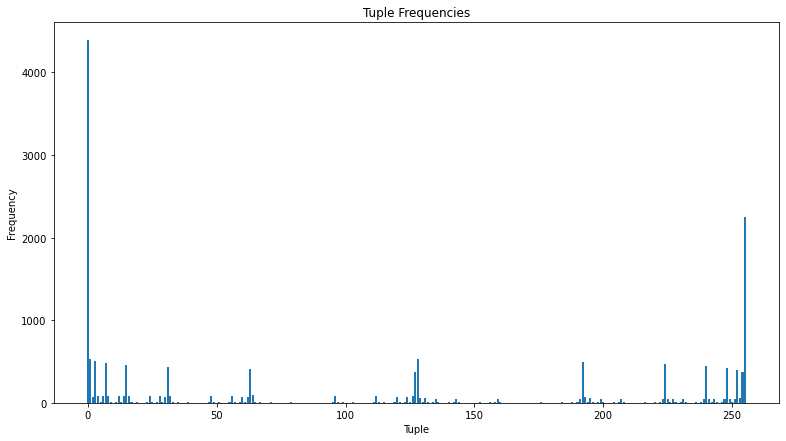

In [13]:
# Function to estimate tuple frequencies from the data
def estimate_tuple_frequencies(X, k):
    # Initialize the dictionary with all possible tuples of length k
    tuples = list(itertools.product([0, 1], repeat=k))
    tuple_frequencies = {tuple_: 0 for tuple_ in tuples}

    # Count the number of occurrences of each tuple in the data
    for i in range(len(X) - k + 1):
        tuple_ = tuple(X[i:i+k])
        tuple_frequencies[tuple_] += 1
    return tuple_frequencies

# Estimate tuple frequencies for k = 8
tuple_frequencies = estimate_tuple_frequencies(X, k=8)

# Plot the tuple frequencies
plt.figure(figsize=(13, 7))
plt.bar(range(len(tuple_frequencies)), tuple_frequencies.values())
plt.xlabel('Tuple')
plt.ylabel('Frequency')
plt.title('Tuple Frequencies')
plt.show()


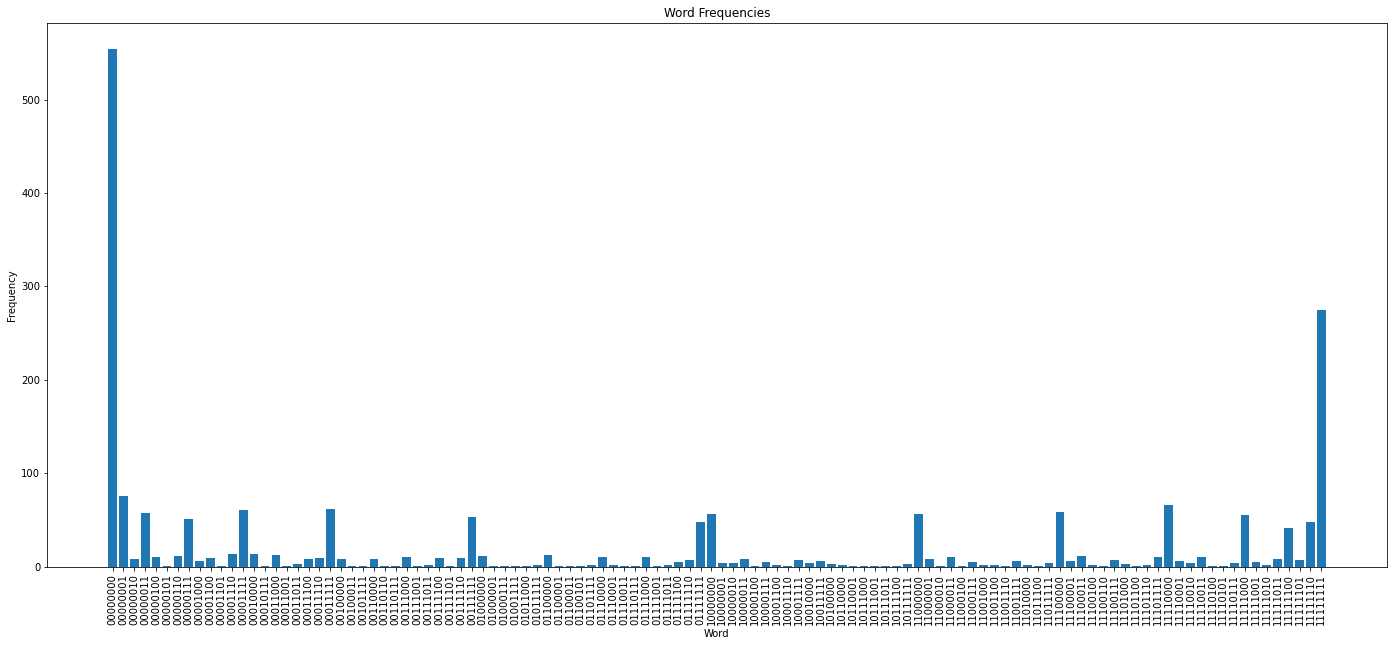

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Take the unique words and plot their frequencies
unique_words, counts = np.unique(chunks, return_counts=True)

plt.figure(figsize=(24, 10))

# Use the unique words as x-tick labels
plt.bar(range(len(unique_words)), counts)
plt.xticks(range(len(unique_words)), unique_words, rotation=90)  # Rotate labels for better readability

plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Word Frequencies')
plt.show()


The graph "Tuple Frequencies" represents the frquencies of each 8-bit tuple in the binary string X (previously generated). Each bar in the graph corresponds to one of the possible 256 unique tuples that can be formed with 8 bits. More specifically, the graph "Word Frequencies" shows the frequency of each unique word that was sampled from X. For both cases, we can observe that the frequencies of the tuples are not uniform, meaning some sequences are more likely than others. The tuples with the tallest bars are the most frequent and will therefore we assigned a shorter code to achieve compression.

The compression rate can be calculated without performing the actual encoding by calculating the expected length of the Huffman encoded data based on the frequencies of the tuples:
$$\text{Compression rate} = \frac{\text{expected length}}{\text{original length}}$$
The entropy is the expected length of each compressed word, so to find the compression rate without doing any encoding we can sum all entropies obtained from all probabilities of the sample and divide such value by the length of each word, which in this case is 8.

In [15]:
# Calculate the entropy of the binary string X
entropy_X = -np.sum(probs * np.log2(probs))
print(f"The entropy of the binary string is {entropy_X} bits")

# Compression rate
compression_rate = entropy_X / 8
print(f"The compression rate is {compression_rate}")

The entropy of the binary string is 4.632888076487937 bits
The compression rate is 0.5791110095609922


**(4) Compress the binary string using Run Length Encoding (RLE) with a maximal stretch of $2^k$. Namely, for $k=3$, the string 000001100011111111.... is encoded as (0,4), (1,1), (0,2), (1,7)..., which is then encoded as (0,100), (1,001), (0,010), (1,111), which is then encoded as 0100 1001 0010 1111 (each stretch of "1"s or "0"s is encoded using $1+k$ bits. We subtract one from the length of the stretch because there are no stretches of length 0). Stretches longer than $2^k$ are separated into a stretch of $2^k$ and the remainder. Experiment with values of $k$ between 2-8 and report the compression rate for each $k$. Which $k$ attains the best compression rate?**

#### <span style="color: LIGHTgreen;">Answer</span>

In [16]:
# RLE algorithm
def RLE_encode(binary_string, k):
    encoded_string = ''
    count = 0
    prev_char = binary_string[0]

    for char in binary_string:
        if char == prev_char:
            count += 1
            # Check if we need to split the run into a chunk
            if count == 2**k:
                encoded_string += f'{prev_char}{bin(count-1)[2:].zfill(k)}'
                count = 0
        else:
            # Encode the remaining part of the run if count is not zero
            if count > 0:
                encoded_string += f'{prev_char}{bin(count-1)[2:].zfill(k)}'
            prev_char = char
            count = 1

    # Encode the last run if count is not zero
    if count > 0:
        encoded_string += f'{prev_char}{bin(count-1)[2:].zfill(k)}'

    return encoded_string

# Calculate the compression rate of the binary string X using RLE for k = 2, 3, 4, 5, 6, 7, 8
for k in range(2, 9):
    # Encode the binary string using RLE
    encoded_string = RLE_encode(X, k)

    # Calculate the compression rate
    compression_rate = len(encoded_string) / (len(X))

    # Print the compression rate for k in [2, 8]
    print(f" For k={k} the compression rate is {compression_rate}")

 For k=2 the compression rate is 0.90252685546875
 For k=3 the compression rate is 0.751953125
 For k=4 the compression rate is 0.69427490234375
 For k=5 the compression rate is 0.740478515625
 For k=6 the compression rate is 0.8502197265625
 For k=7 the compression rate is 0.97119140625
 For k=8 the compression rate is 1.09259033203125


We can observe that as $k$ increases, the compression rate decreases and reaches its lowest point for $k=4$ to then increase again. Therefore, for this binary string, the optimal value of $k$ is $4$ since it minimizes the compression rate and thus maximizes compression efficiency. Indeed, the smaller the compression rate, the shorter the encoded string is in respect to the original string and therefore effective compression is achieved. We can observe that for $k=8$ the compression rate is bigger than 1, which suggests that the encoded string is longer than the original string.

**(5) Bonus: Can you think about a way to improve the proposed RLE?**

#### <span style="color: LIGHTgreen;">Answer</span>
One option to improve the proposed RLE would be to implement a two-level RLE. This implies that the first level compresses the data (original string) and the second level compresses the output of the first level. This approach can yield better results in terms of the compression rate for cases in which there are nested repetitive patterns.